In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn import preprocessing
import matplotlib.pyplot as plt  
%matplotlib inline


In [ ]:
!git clone https://github.com/Nitesh167/raw-materials-forecasting.git


Cloning into 'raw-materials-forecasting'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 47 (delta 8), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (47/47), done.


In [ ]:
cd raw-materials-forecasting/

/content/raw-materials-forecasting/raw-materials-forecasting/raw-materials-forecasting/raw-materials-forecasting


In [ ]:
df=pd.read_csv('dataset_value2.csv')
df.columns=['Year',"no_of_cars","steel","plastics","iron","rubber","aluminium","glass","copper"]
df.head(10)


,Year,no_of_cars,steel,plastics,iron,rubber,aluminium,glass,copper
0,2001-2002,669719,505463.7,86072.3,70039.2,38816.9,24471.5,25315.3,8016.5
1,2002-2003,723330,572265.4,100524.4,76557.2,44020.4,28708.9,29665.9,9569.6
2,2003-2004,989560,811239.3,139558.5,108891.2,61251.2,42195.3,40834.2,13611.4
3,2004-2005,1209876,1045361.9,187176.3,139499.3,82993.2,54740.2,51208.6,19423.9
4,2005-2006,1309300,1151778.1,206929.6,150316.8,93703.9,62469.3,56612.8,19521.6
5,2006-2007,1545234,1409559.4,259339.7,177695.7,117663.3,79242.6,72038.8,24012.9
6,2007-2008,1777583,1645920.9,311564.3,208558.4,146554.6,98642.5,90187.4,28183.5
7,2008-2009,1838593,1648801.5,359327.6,212921.7,153244.8,102163.2,87973.9,31216.5
8,2009-2010,2357411,2070944.3,398196.5,251241.0,204582.0,136388.0,107674.7,39480.7
9,2010-2011,2987296,2619488.2,522065.8,286828.2,261032.9,178601.4,141965.2,50374.7


In [ ]:
#delete column 
del df["Year"]

df.head()

,no_of_cars,steel,plastics,iron,rubber,aluminium,glass,copper
0,669719,505463.7,86072.3,70039.2,38816.9,24471.5,25315.3,8016.5
1,723330,572265.4,100524.4,76557.2,44020.4,28708.9,29665.9,9569.6
2,989560,811239.3,139558.5,108891.2,61251.2,42195.3,40834.2,13611.4
3,1209876,1045361.9,187176.3,139499.3,82993.2,54740.2,51208.6,19423.9
4,1309300,1151778.1,206929.6,150316.8,93703.9,62469.3,56612.8,19521.6


In [ ]:
'''from sklearn.preprocessing import StandardScaler
cols_to_norm = ['no_of_cars','steel','plastics','iron','rubber','aluminium','glass','copper']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])'''

"from sklearn.preprocessing import StandardScaler\ncols_to_norm = ['no_of_cars','steel','plastics','iron','rubber','aluminium','glass','copper']\ndf[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])"

In [ ]:
df.head(10)

,no_of_cars,steel,plastics,iron,rubber,aluminium,glass,copper
0,669719,505463.7,86072.3,70039.2,38816.9,24471.5,25315.3,8016.5
1,723330,572265.4,100524.4,76557.2,44020.4,28708.9,29665.9,9569.6
2,989560,811239.3,139558.5,108891.2,61251.2,42195.3,40834.2,13611.4
3,1209876,1045361.9,187176.3,139499.3,82993.2,54740.2,51208.6,19423.9
4,1309300,1151778.1,206929.6,150316.8,93703.9,62469.3,56612.8,19521.6
5,1545234,1409559.4,259339.7,177695.7,117663.3,79242.6,72038.8,24012.9
6,1777583,1645920.9,311564.3,208558.4,146554.6,98642.5,90187.4,28183.5
7,1838593,1648801.5,359327.6,212921.7,153244.8,102163.2,87973.9,31216.5
8,2357411,2070944.3,398196.5,251241.0,204582.0,136388.0,107674.7,39480.7
9,2987296,2619488.2,522065.8,286828.2,261032.9,178601.4,141965.2,50374.7


In [ ]:
np.random.seed(99)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [ ]:
# print(train)

In [ ]:
#print(test)

# **STEEL**

In [ ]:
from sklearn import linear_model
model_steel = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_of_cars']])
train_y_steel = np.asanyarray(train[['steel']])
model_steel.fit (train_x, train_y_steel)
# The coefficients
print ('Coefficients: ', model_steel.coef_)
print ('Intercept: ',model_steel.intercept_)

Coefficients:  [[0.82312167]]
Intercept:  [66914.70216473]


Text(0, 0.5, 'steel')

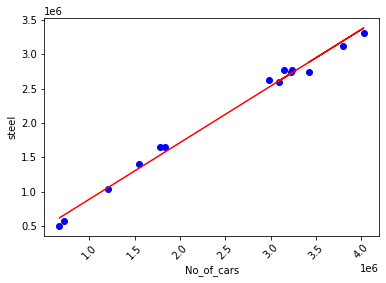

In [ ]:
plt.scatter(train.no_of_cars, train.steel,  color='blue')
plt.xticks(rotation=45)
plt.plot(train_x, model_steel.coef_[0][0]*train_x + model_steel.intercept_[0], '-r')
plt.xlabel("No_of_cars")
plt.ylabel("steel")

In [ ]:
y_steel_pred = model_steel.predict(test[['steel']])
#print(y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

test_x = np.asanyarray(test[['no_of_cars']])
test_y_steel = np.asanyarray(test[['steel']])
test_y_hat_steel =model_steel.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_steel - test_y_steel)))
print("R2-score: %.2f" % r2_score(test_y_hat_steel , test_y_steel) )
rmse= mean_squared_error( test_y_steel,test_y_hat_steel, squared=False)
nrmse = rmse/np.std(test_y_steel)
print("Rmse: %.2f" % nrmse)



Mean absolute error: 70297.75
R2-score: 0.99
Rmse: 0.10


In [ ]:
output = model_steel.predict([['1209876']])
print(output)

[[1062789.85522696]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# **PLASTICS**

In [ ]:
from sklearn import linear_model
model_plastics = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_of_cars']])
train_y_plastics = np.asanyarray(train[['plastics']])
model_plastics.fit (train_x, train_y_plastics)
# The coefficients
print ('Coefficients: ', model_plastics.coef_)
print ('Intercept: ',model_plastics.intercept_)

Coefficients:  [[0.20379943]]
Intercept:  [-51039.43601556]


Text(0, 0.5, 'plastics')

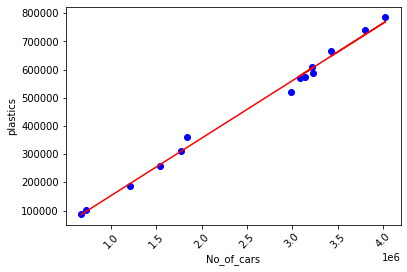

In [ ]:
plt.scatter(train.no_of_cars, train.plastics,  color='blue')
plt.xticks(rotation=45)
plt.plot(train_x, model_plastics.coef_[0][0]*train_x + model_plastics.intercept_[0], '-r')
plt.xlabel("No_of_cars")
plt.ylabel("plastics")

In [ ]:
y_plastics_pred = model_plastics.predict(test[['plastics']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['no_of_cars']])
test_y_plastics = np.asanyarray(test[['plastics']])
test_y_hat_plastics =model_plastics.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_plastics - test_y_plastics)))

print("R2-score: %.2f" % r2_score(test_y_hat_plastics , test_y_plastics) )
rmse= mean_squared_error( test_y_plastics,test_y_hat_plastics, squared=False)
nrmse = rmse/np.std(test_y_plastics)
print("Rmse: %.2f" % nrmse)

Mean absolute error: 15941.18
R2-score: 0.99
Rmse: 0.08


In [ ]:
output = model_plastics.predict([['4028471']])
print(output)

[[769960.64107488]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# **IRON**

In [ ]:
from sklearn import linear_model
model_iron = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_of_cars']])
train_y_iron = np.asanyarray(train[['iron']])
model_iron.fit (train_x, train_y_iron)
# The coefficients
print ('Coefficients: ', model_iron.coef_)
print ('Intercept: ',model_iron.intercept_)

Coefficients:  [[0.07437028]]
Intercept:  [49735.19619911]


Text(0, 0.5, 'iron')

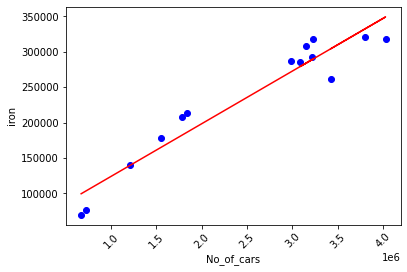

In [ ]:
plt.scatter(train.no_of_cars, train.iron,  color='blue')
plt.xticks(rotation=45)
plt.plot(train_x, model_iron.coef_[0][0]*train_x + model_iron.intercept_[0], '-r')
plt.xlabel("No_of_cars")
plt.ylabel("iron")

In [ ]:
y_iron_pred = model_iron.predict(test[['iron']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['no_of_cars']])
test_y_iron = np.asanyarray(test[['iron']])
test_y_hat_iron =model_iron.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_iron - test_y_iron)))

print("R2-score: %.2f" % r2_score(test_y_hat_iron , test_y_iron) )
rmse= mean_squared_error( test_y_iron,test_y_hat_iron,squared=False)
nrmse = rmse/np.std(test_y_iron)
print("Rmse: %.2f" % nrmse)

Mean absolute error: 19395.57
R2-score: 0.90
Rmse: 0.33


In [ ]:
output = model_iron.predict([['3062221']])
print(output)

[[277473.42972563]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# **RUBBER**

In [ ]:
from sklearn import linear_model
model_rubber = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_of_cars']])
train_y_rubber = np.asanyarray(train[['rubber']])
model_rubber.fit (train_x, train_y_rubber)
# The coefficients
print ('Coefficients: ', model_rubber.coef_)
print ('Intercept: ',model_rubber.intercept_)

Coefficients:  [[0.0796503]]
Intercept:  [-4682.83692741]


Text(0, 0.5, 'rubber')

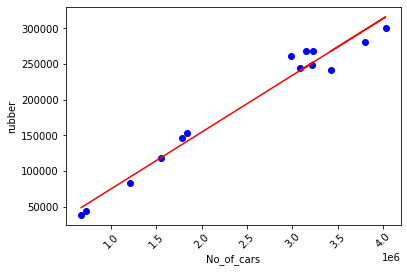

In [ ]:
plt.scatter(train.no_of_cars, train.rubber,  color='blue')
plt.xticks(rotation=45)
plt.plot(train_x, model_rubber.coef_[0][0]*train_x + model_rubber.intercept_[0], '-r')
plt.xlabel("No_of_cars")
plt.ylabel("rubber")

In [ ]:
y_rubber_pred = model_rubber.predict(test[['rubber']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['no_of_cars']])
test_y_rubber = np.asanyarray(test[['rubber']])
test_y_hat_rubber =model_rubber.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_rubber - test_y_rubber)))

print("R2-score: %.2f" % r2_score(test_y_hat_rubber , test_y_rubber) )
rmse= mean_squared_error( test_y_rubber,test_y_hat_rubber,squared=False)
nrmse = rmse/np.std(test_y_rubber)
print("Rmse: %.2f" % nrmse)

Mean absolute error: 16996.27
R2-score: 0.96
Rmse: 0.22


In [ ]:
output = model_rubber.predict([['669719']])
print(output)

[[48660.48171287]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# **ALUMINIUM**

In [ ]:
from sklearn import linear_model
model_aluminium = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_of_cars']])
train_y_aluminium = np.asanyarray(train[['aluminium']])
model_aluminium.fit (train_x, train_y_aluminium)
# The coefficients
#print ('Coefficients: ', model_aluminium.coef_)
#print ('Intercept: ',model_aluminium.intercept_)

LinearRegression()

Text(0, 0.5, 'aluminium')

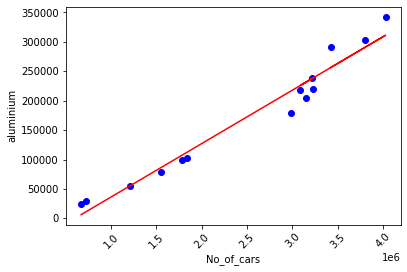

In [ ]:
plt.scatter(train.no_of_cars, train.aluminium,  color='blue')
plt.xticks(rotation=45)
plt.plot(train_x, model_aluminium.coef_[0][0]*train_x + model_aluminium.intercept_[0], '-r')
plt.xlabel("No_of_cars")
plt.ylabel("aluminium")

In [ ]:
y_aluminium_pred = model_aluminium.predict(test[['aluminium']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['no_of_cars']])
test_y_aluminium = np.asanyarray(test[['aluminium']])
test_y_hat_aluminium =model_aluminium.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_aluminium - test_y_aluminium)))

print("R2-score: %.2f" % r2_score(test_y_hat_aluminium , test_y_aluminium) )
rmse= mean_squared_error( test_y_aluminium,test_y_hat_aluminium,squared=False)
nrmse = rmse/np.std(test_y_aluminium)
print("Rmse: %.2f" % nrmse)

Mean absolute error: 18301.50
R2-score: 0.94
Rmse: 0.21


In [ ]:
output = model_aluminium.predict([['669719']])
print(output)

[[6323.24283598]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# **GLASS**

In [ ]:
from sklearn import linear_model
model_glass = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_of_cars']])
train_y_glass = np.asanyarray(train[['glass']])
model_glass.fit (train_x, train_y_glass)

# The coefficients
print ('Coefficients: ', model_glass.coef_)
print ('Intercept: ',model_glass.intercept_)

Coefficients:  [[0.04710247]]
Intercept:  [-1952.39108927]


Text(0, 0.5, 'glass')

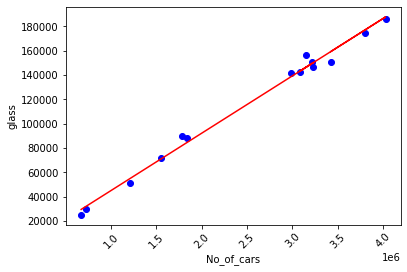

In [ ]:
plt.scatter(train.no_of_cars, train.glass,  color='blue')
plt.xticks(rotation=45)
plt.plot(train_x, model_glass.coef_[0][0]*train_x + model_glass.intercept_[0], '-r')
plt.xlabel("No_of_cars")
plt.ylabel("glass")

In [ ]:
y_glass_pred = model_glass.predict(test[['rubber']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['no_of_cars']])
test_y_glass = np.asanyarray(test[['glass']])
test_y_hat_glass =model_glass.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_glass - test_y_glass)))

print("R2-score: %.2f" % r2_score(test_y_hat_glass , test_y_glass) )
rmse= mean_squared_error( test_y_glass,test_y_hat_glass,squared=False)
nrmse = rmse/np.std(test_y_glass)
print("Rmse: %.2f" % nrmse)

Mean absolute error: 4100.76
R2-score: 0.99
Rmse: 0.09


In [ ]:
output = model_glass.predict([['3220172']])
print(output)

[[149725.65954496]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# **COPPER**

In [ ]:
from sklearn import linear_model
model_copper = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_of_cars']])

train_y_copper = np.asanyarray(train[['copper']])
model_copper.fit (train_x, train_y_copper)
# The coefficients
print ('Coefficients: ', model_copper.coef_)
print ('Intercept: ',model_copper.intercept_)

Coefficients:  [[0.01830755]]
Intercept:  [-3885.46579951]


Text(0, 0.5, 'copper')

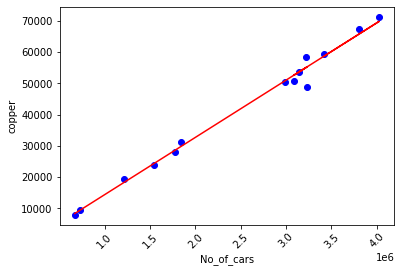

In [ ]:
plt.scatter(train.no_of_cars, train.copper,  color='blue')
plt.xticks(rotation=45)
plt.plot(train_x, model_copper.coef_[0][0]*train_x + model_copper.intercept_[0], '-r')
plt.xlabel("No_of_cars")
plt.ylabel("copper")

In [ ]:
y_copper_pred_train=model_copper.predict(train[['copper']])

y_copper_pred = model_copper.predict(test[['copper']])

#y_copper_pred.reshape(-1,1)
y_copper_pred


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[-3636.2744333 ],
       [-3528.07315992],
       [-3162.67096785],
       [-2859.69934706],
       [-2669.83176115],
       [-2985.42277515]])

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['no_of_cars']])
test_y_copper = np.asanyarray(test[['copper']])
test_y_hat_copper =model_copper.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_copper - test_y_copper)))

print("R2-score: %.2f" % r2_score(test_y_hat_copper , test_y_copper) )
rmse= mean_squared_error( test_y_copper,test_y_hat_copper,squared=False)
nrmse = rmse/np.std(test_y_copper)
print("Rmse: %.2f" % nrmse)

Mean absolute error: 1873.43
R2-score: 0.99
Rmse: 0.12


In [ ]:
output = model_copper.predict([['3220172']])


#print(output.shape)
print(output)

[[55067.98939843]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


R2-score of steel: 0.99
R2-score of plastics: 0.99
R2-score: of iron 0.90
R2-score: of rubber 0.96
R2-score of aluminium: 0.94
R2-score of glass: 0.99
R2-score of copper: 0.99


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array

[[8375.44730132]]
[[9356.93328611]]
[[14230.95193398]]
[[18264.39779817]]
[[20084.60750423]]
[[24403.98066153]]
[[28657.72125731]]
[[29774.66479375]]
[[39272.9505123]]
[[50804.60072457]]
[[53711.34512895]]
[[55313.10916583]]
[[52647.74978895]]
[[55067.98939843]]
[[59551.01373212]]
[[65713.79225948]]
[[69715.76744773]]
[[69865.96257596]]
[[58809.90585966]]
[[52176.29379895]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
